In [5]:
import sys
sys.path.insert(0, 'python')
import cv2
import model
import util
from body import Body
import matplotlib.pyplot as plt
import copy
import numpy as np
%matplotlib inline

body_estimation = Body('model/body_pose_model.pth')

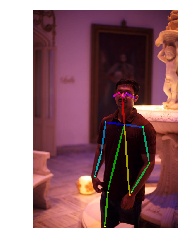

In [10]:
test_image = 'images/t2.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)


plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [8]:
candidate.shape

(58, 4)

In [9]:
subset.shape

(2, 20)